# Práctica 6

Ejercicio 1:

1. Dados los datos siguientes, elegir las caracteristicas necesarias para ajustar una curva de regresión.
|  x  |  y  |
|-----|-----|
| 0.1 |-0.01|
|1.05 |0.978|
|2.01 | 1.4 |
|3.003|1.74 |
|4.11 | 2.1 |
|4.99 | 2.3 |
|5.89 | 2.5 |

    a) Gráficar los datos. ¿Qué tipo de curva $y=\theta f(x)$ tiene un comportamiento semejante a la gráfica 
    obtenida? (e.g. exponencial, coseno, logaritmo, etc.)
    
    b) Generar nuevas caracteristicas $y=\theta f(x)$ usando la $f(x)$ identificada anteriormente. Calcula los 
    valores correspondientes para las nuevas $x'$
    
    c) Gráficar los datos $(x',y)$ con las caracteristicas $x'$ elegidas.
    
    d) Ajustar el plano/recta en el espacio transformado $y$ vs $x'$ utilizando la ecuación normal 
    $\theta=(X^T X)^{-1}X^T Y$.
    
    e) Calcular la expresión correspondiente en el espacio original (sustituir las $x'$ por la función que 
    representan $f(x)$).
    
    f) Gráficar la función ajustada en el espacio original $y$ vs $x$.

In [1]:
#Bibliotecas que les pueden ser útiles para el desarrollo de la práctica.

import math
import importlib
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import numpy.matlib as nmat
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.core.pylabtools import figsize
import ipywidgets as widgets
colores = ["#BD3495", "#7EBD34","#BD3450"]
from IPython.display import display
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Ellipse
import numpy.random as rnd
from sympy import var
from sympy.plotting import plot_implicit
from IPython import display

a) Gráficar los datos. ¿Qué tipo de curva $y=\theta f(x)$ tiene un comportamiento semejante a la gráfica 
    obtenida? (e.g. exponencial, coseno, logaritmo, etc.)

X =  [[0.1  ]
 [1.05 ]
 [2.01 ]
 [3.003]
 [4.11 ]
 [4.99 ]
 [5.89 ]]
Y =  [[-0.01 ]
 [ 0.978]
 [ 1.4  ]
 [ 1.74 ]
 [ 2.1  ]
 [ 2.3  ]
 [ 2.5  ]]


Text(0, 0.5, 'y')

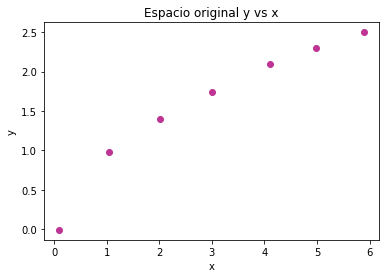

In [2]:
X = np.array([[0.1,1.05,2.01,3.003,4.11,4.99,5.89]]).T
Y = np.array([[-0.01,0.978,1.4,1.74,2.1,2.3,2.5]]).T
print('X = ',X)
print('Y = ',Y)
plt.scatter(X,Y,color=colores[0])
plt.title('Espacio original y vs x')
plt.xlabel('x')
plt.ylabel('y')


La curva $f(x)=\sqrt{x}$ se comporta de manera semejante a la gráfica obtenida arriba.

 b) Generar nuevas caracteristicas $y=\theta f(x)$ usando la $f(x)$ identificada anteriormente. Calcula los 
    valores correspondientes para las nuevas $x'$
    

In [3]:
#Aplicar raiz cuadrada a cada elemento de X.
X1 = np.sqrt(X)
print("X'=",X1)

X'= [[0.31622777]
 [1.02469508]
 [1.41774469]
 [1.73291662]
 [2.02731349]
 [2.23383079]
 [2.42693222]]


 c) Gráficar los datos $(x',y)$ con las caracteristicas $x'$ elegidas.

Text(0, 0.5, 'y')

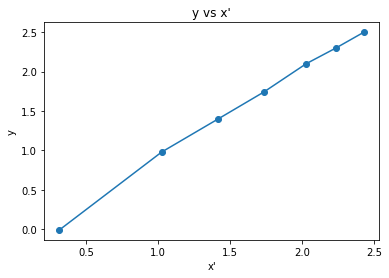

In [4]:
plt.scatter(X1,Y)
plt.plot(X1,Y)
plt.title("y vs x'")
plt.xlabel("x'")
plt.ylabel('y')

 d) Ajustar el plano/recta en el espacio transformado $y$ vs $x'$ utilizando la ecuación normal 
    $\theta=(X^T X)^{-1}X^T Y$.

In [5]:
#EJERCICIO 1.D:
#Creamos la matriz X
MX = np.column_stack((np.array(nmat.ones(X.shape)),X1))
print('MX = ',MX)
#Calcular los Valores de theta optimos.
theta = np.dot(np.linalg.inv(np.dot(MX.T,MX)),np.dot(MX.T,Y))
print('theta_optima = ',theta)

MX =  [[1.         0.31622777]
 [1.         1.02469508]
 [1.         1.41774469]
 [1.         1.73291662]
 [1.         2.02731349]
 [1.         2.23383079]
 [1.         2.42693222]]
theta_optima =  [[-0.30673127]
 [ 1.17670109]]


e) Calcular la expresión correspondiente en el espacio original (sustituir las $x'$ por la función que 
   representan $f(x)$).
    $$y=\theta_0 + \theta_1 x'= -0.30673127 + 1.17670109\sqrt{x}$$

In [6]:
yf = np.array(-0.30673127 + 1.17670109*np.sqrt(X))

 f) Gráficar la función ajustada en el espacio original $y$ vs $x$.

Text(0, 0.5, 'y')

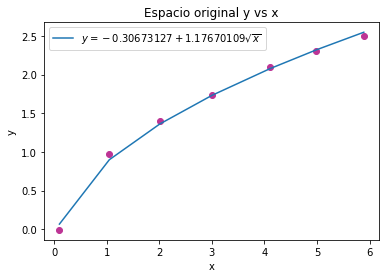

In [7]:
plt.scatter(X,Y,color=colores[0])
plt.plot(X,yf,label="$y=-0.30673127 + 1.17670109\sqrt{x}$")
plt.legend(loc="upper left")
plt.title('Espacio original y vs x')
plt.xlabel('x')
plt.ylabel('y')

## 2 Clasificación.

2. Entrene un clasificador utilizando descenso por el gradiente para detectar la frontera entre los datos siguientes.

|       x       |       y       | clasificación |
|---------------|---------------|---------------|
| -0.6861007046 | -2.7317977268 |     FALSO     |
|  0.1945728382 |  0.451296404  |   VERDADERO   |
| -2.3158346172 | -0.6509207096 |     FALSO     |
| -1.0254515503 | -0.0809364635 |   VERDADERO   |
|  0.4311453719 |  0.8026880194 |   VERDADERO   |
| -3.7719061095 |  0.814367149  |     FALSO     |
|  0.8427785188 | -1.0716033783 |   VERDADERO   |
|  2.2864584569 | -2.9176860601 |     FALSO     |
| -0.2791914176 | -0.8346607406 |   VERDADERO   |
| -0.9005654622 | -2.2787579969 |     FALSO     |
|  0.1421184987 | -1.213108765  |   VERDADERO   |
|  3.1509795878 | -3.7415509261 |     FALSO     |
|  0.6174679771 | -0.5790232979 |   VERDADERO   |
|  2.0068530366 | -1.4894149248 |     FALSO     |
|  3.5943855252 | -0.8032932784 |     FALSO     |

    a) Gráficar los datos.
    
    b) Listar características derivadas correspondientes a todos términos de un polinomio de segundo grado y 
    calcular sus valores.
    
    c) Ajustar el plano en el espacio transformado. Observe que no se pide gráficarlo pues este espacio tiene 
    demasiadas dimensiones.
    
    d) Calcular la expresión correspondiente en el espacio original.
    
    e) Gráficar la curva ajustada en el espacio original.

In [8]:
def plot_transformed(X, Y, Theta):
    '''
    Función auxiliar para visualizar la curva descrita por los pesos.
    Parámetros:
    X: Valores de entreada.
    Y: Etiquetas de los valores.
    Theta: Pesos actuales del entrenamiento.
    '''
    Theta = Theta.ravel()
    print("Parámetros iniciales. Theta = ", Theta)
    var('x y')
    p = plot_implicit(Theta[0] + Theta[1] * x + Theta[2] * y + Theta[3] *x*y + Theta[4] * x**2 + Theta[5] * y**2, x, y,
                      title = "Frontera", show=False)
    p.show()
    backend = p._backend
    axes = backend.fig.get_axes()[0]
    c = np.vectorize(lambda b: colores[b])(Y.ravel())
    axes.scatter(X[:,0], X[:,1], color=c)
    return backend.fig

  a) Gráficar los datos.

X|Y: [[-0.6861007  -2.73179773]
 [ 0.19457284  0.4512964 ]
 [-2.31583462 -0.65092071]
 [-1.02545155 -0.08093646]
 [ 0.43114537  0.80268802]
 [-3.77190611  0.81436715]
 [ 0.84277852 -1.07160338]
 [ 2.28645846 -2.91768606]
 [-0.27919142 -0.83466074]
 [-0.90056546 -2.278758  ]
 [ 0.1421185  -1.21310877]
 [ 3.15097959 -3.74155093]
 [ 0.61746798 -0.5790233 ]
 [ 2.00685304 -1.48941492]
 [ 3.59438553 -0.80329328]]


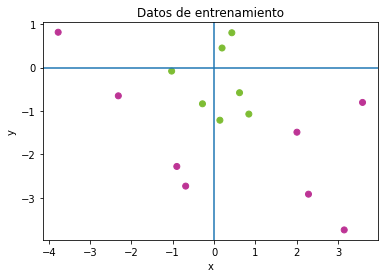

In [9]:
x = np.array([[-0.6861007046,  0.1945728382, -2.3158346172, -1.0254515503,  0.4311453719, -3.7719061095,
                0.8427785188,  2.2864584569, -0.2791914176, -0.9005654622,  0.1421184987,  3.1509795878,
                0.6174679771,  2.0068530366,  3.5943855252]]).T
y = np.array([[-2.7317977268,  0.4512964040, -0.6509207096, -0.0809364635,  0.8026880194,  0.8143671490,
               -1.0716033783, -2.9176860601, -0.8346607406, -2.2787579969, -1.2131087650, -3.7415509261,
               -0.5790232979, -1.4894149248, -0.8032932784]]).T
X_org = np.column_stack((x,y))
print("X|Y:",X_org)
Y_2 = np.array([[0,1,0,1,1,0,1,0,1,0,1,0,1,0,0]]).T
c = np.vectorize(lambda b: colores[b])(Y_2.ravel())
plt.scatter(X_org[:,0],X_org[:,1],color=c)
plt.title("Datos de entrenamiento")
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(y=0)
plt.axvline(x=0)

 b) Listar características derivadas correspondientes a todos términos de un polinomio de segundo grado y 
    calcular sus valores.    

$x_3 ' = xy,\quad x_4 ' = x^{2},\quad x_5 ' = y^{2}$

In [10]:
X_3 = x*y
X_4 = x**2
X_5 = y**2
print("X3'=",X_3)
print("X4'=",X_4)
print("X5'=",X_5)

X3'= [[  1.87428835]
 [  0.08781002]
 [  1.50742471]
 [  0.08299642]
 [  0.34607522]
 [ -3.07171642]
 [ -0.90312431]
 [ -6.67116797]
 [  0.23303012]
 [  2.05217075]
 [ -0.1724052 ]
 [-11.78955059]
 [ -0.35752834]
 [ -2.98903686]
 [ -2.88734573]]
X4'= [[ 0.47073418]
 [ 0.03785859]
 [ 5.36308997]
 [ 1.05155088]
 [ 0.18588633]
 [14.2272757 ]
 [ 0.71027563]
 [ 5.22789228]
 [ 0.07794785]
 [ 0.81101815]
 [ 0.02019767]
 [ 9.92867236]
 [ 0.3812667 ]
 [ 4.02745911]
 [12.9196073 ]]
X5'= [[7.46271882e+00]
 [2.03668444e-01]
 [4.23697770e-01]
 [6.55071112e-03]
 [6.44308056e-01]
 [6.63193853e-01]
 [1.14833380e+00]
 [8.51289195e+00]
 [6.96658552e-01]
 [5.19273801e+00]
 [1.47163288e+00]
 [1.39992033e+01]
 [3.35267980e-01]
 [2.21835682e+00]
 [6.45280091e-01]]


 c) Ajustar el plano en el espacio transformado. Observe que no se pide graficarlo pues este espacio tiene 
    demasiadas dimensiones.

Theta = [[ 4.71931017]
 [ 2.78358693]
 [ 2.79497779]
 [ 1.90850559]
 [-0.81042441]
 [-0.22910544]]


/tmp/ipykernel_10604/3674635671.py:15: RuntimeWarning: divide by zero encountered in log
  errores[i] = - np.sum(Y_2 * np.log(H) + (1 - Y_2) * np.log(1 - H))


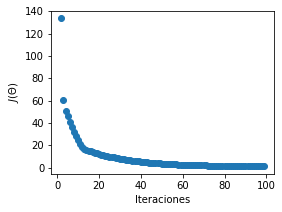

In [11]:
MatX = np.column_stack((np.ones((15,1)),X_org,X_3,X_4,X_5))

def sigmoide(M):
    return 1 / (1 + np.exp(-M))

Theta = np.array([[1,2,3,4,5,6]]).T

def descenso(iteraciones):
    figsize(4,3)
    global Theta
    num_iter = iteraciones
    errores = np.zeros(num_iter)
    for i in range(0,num_iter):
        H = sigmoide(np.dot(MatX,Theta))
        errores[i] = - np.sum(Y_2 * np.log(H) + (1 - Y_2) * np.log(1 - H))
        grad = np.dot(MatX.T, H-Y_2) / 6
        Theta = Theta - 0.15 * grad
    plt.scatter(np.arange(num_iter),errores)
    plt.xlabel("Iteraciones")
    plt.ylabel("$J(\Theta)$")

descenso(100)
print("Theta =", Theta)

d) Calcular la expresión correspondiente en el espacio original.

$0 = \theta_0 + \theta_1 x_1 ' + \theta_2  x_2 ' + \theta_3 x_3 ' + \theta_4 x_4 ' + \theta_5 x_5 '$

$0 = 4.71931017 + 2.78358693 x + 2.79497779  y + 1.90850559 xy + -0.81042441 x^{2} + -0.22910544 y^{2}$


e) Gráficar la curva ajustada en el espacio original.

Parámetros iniciales. Theta =  [ 4.71931017  2.78358693  2.79497779  1.90850559 -0.81042441 -0.22910544]


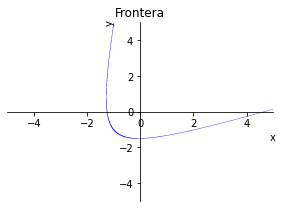

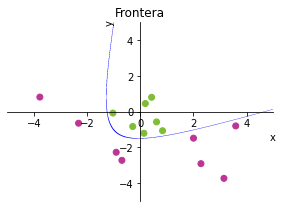

In [12]:
plot_transformed(X_org,Y_2,Theta)